In [74]:
import requests
import bs4 as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
page = requests.get("http://data.sedema.cdmx.gob.mx:9000/datos/areas-verdes-por-categoria/Plazas%20y%20jardines")
soup = bs.BeautifulSoup(page.content, 'html.parser')


In [36]:
areas = soup.find_all('table',class_='table table-striped table-bordered table-sm')
areas[0].find_all('td')[1]
areas_verdes = []
direccion =[]
extension = []
alcaldia = []

for i in range(len(areas)):
    print(areas[i].find_all('td')[1].text[:-5].replace('(',''),areas[i].find_all('td')[6].text.replace('(',''), float(areas[i].find_all('td')[8].text.split(' ')[1].replace(',','')),areas[i].find_all('td')[16].text)
    areas_verdes.append(areas[i].find_all('td')[1].text[:-5].replace('(',''))
    direccion.append(areas[i].find_all('td')[6].text.replace('(',''))
    extension.append(float(areas[i].find_all('td')[8].text.split(' ')[1].replace(',','')))
    alcaldia.append(areas[i].find_all('td')[16].text)


FUENTE SAN JACINTO  PL. SAN JACINTO, SAN ÁNGEL TNT 7164.02 Álvaro Obregón
JARDIN DON MANUELITO  DON MANUELITO 1759.4 Álvaro Obregón
JARDIN  DON MANUELITO 1971.13 Álvaro Obregón
JARDÍN PUBLICO  AV. TOLUCA Y PUEBLA 265.43 Álvaro Obregón
PLAZA DE LA PAZ  CALLE PLAZA DEL CARMEN 4 599.19 Álvaro Obregón
PARQUE DE LA BOMBILLA  CALLE DE LA PAZ 43488.36 Álvaro Obregón
JARDIN DEL CARMEN  AV. REVOLUCION Y FCO. I. MADERO, COL. SAN ANGEL 2318.26 Álvaro Obregón
JARDIN  ESQ. QUERETARO, AV TOLUCA S/N Y QUERETARO 480.08 Álvaro Obregón
PARQUE DE LA BOMBILLA  AV. DE LA PAZ Y AV. DE LOS INSURGENTES SUR 7118.89 Álvaro Obregón
PLAZA DE LOS LICENCIADOS  C. BENITO JUÁREZ 2A 951.13 Álvaro Obregón
JARDIN  AV. TOLUCA S/N 293.64 Álvaro Obregón
JARDÍN DEL ARTE  JDN. DEL ARTE S/N 9567.1 Álvaro Obregón
PARQUE LAS NINFAS  FORTUNA NACIONAL Y CAM. VERDE 2968.59 Azcapotzalco
JARDINERAS  AV. REFINERÍA AZCAPOTZALCO 1584.79 Azcapotzalco
FARO AZCAPOTZALCO XOCHICALLI CULTURA NTE. 34091.14 Azcapotzalco
JARDÍN LAS NACIONES  HA

In [185]:
dictionary = {'Areas verdes':areas_verdes,'Direccion':direccion,'Extension':extension,'Alcaldia':alcaldia}

df0 = pd.DataFrame.from_dict(dictionary)

print(df0)

                           Areas verdes                       Direccion  \
0                   FUENTE SAN JACINTO   PL. SAN JACINTO, SAN ÁNGEL TNT   
1                 JARDIN DON MANUELITO                    DON MANUELITO   
2                               JARDIN                    DON MANUELITO   
3                       JARDÍN PUBLICO              AV. TOLUCA Y PUEBLA   
4                      PLAZA DE LA PAZ         CALLE PLAZA DEL CARMEN 4   
..                                  ...                             ...   
305   ESCUELA SECUNDARIA TÉCNICA N° 86         PROL. RÍO CHURUBUSCO S/N   
306                  CAMELLON OTE. 146      OTE. 146 Y AV. IZTACCÍHUATL   
307                     PARQUE KYLE ROC  RINCÓN AMOR Y ACUEDUCTO ALDAMA   
308  CAMELLON CAMINO VIEJO A STA. CRUZ         CAMINO VIEJO A STA. CRUZ   
309       CAMELLON AV. 16 DE SEPTIEMBRE            AV. 16 DE SEPTIEMBRE   

     Extension             Alcaldia  
0      7164.02       Álvaro Obregón  
1      1759.40       Ál

In [183]:
dictionary_alcald_extension = {'Coyoacán': [54.40*1000000],'Cuauhtémoc': [ 32.40*1000000],'Venustiano Carranza' :    [33.40*1000000],'Iztapalapa'  :   [117.00*1000000],'Milpa Alta'  :   [228.41*1000000],'Tláhuac' :    [85.34*1000000],
           'Álvaro Obregón': [96.17*1000000]     ,
           'Miguel Hidalgo':     [46.99*1000000],
                'Iztacalco':      [23.30*1000000],
       'Gustavo A. Madero':      [94.07*1000000],
           'Benito Juárez':      [26.63*1000000],
              'Xochimilco' :     [118.00*1000000],
  'La Magdalena Contreras':      [74.58*1000000],
   'Cuajimalpa de Morelos':      [74.58*1000000],
                 'Tlalpan':      [340.07*1000000]}


data_alcald_extension = pd.DataFrame.from_dict(dictionary_alcald_extension).T.reset_index().rename(columns={'index':'Alcaldia',0:'Extensión territorial de alcaldia'})
data_alcald_extension

,Alcaldia,Extensión territorial de alcaldia
0,Coyoacán,54400000.0
1,Cuauhtémoc,32400000.0
2,Venustiano Carranza,33400000.0
3,Iztapalapa,117000000.0
4,Milpa Alta,228410000.0
5,Tláhuac,85340000.0
6,Álvaro Obregón,96170000.0
7,Miguel Hidalgo,46990000.0
8,Iztacalco,23300000.0
9,Gustavo A. Madero,94070000.0


In [187]:
df = pd.merge(df0,data_alcald_extension,left_on='Alcaldia',right_on='Alcaldia')
df['Fracción'] = df['Extension']/df['Extensión territorial de alcaldia']
df

,Areas verdes,Direccion,Extension,Alcaldia,Extensión territorial de alcaldia,Fracción
0,FUENTE SAN JACINTO,"PL. SAN JACINTO, SAN ÁNGEL TNT",7164.02,Álvaro Obregón,96170000.0,7.449329e-05
1,JARDIN DON MANUELITO,DON MANUELITO,1759.40,Álvaro Obregón,96170000.0,1.829469e-05
2,JARDIN,DON MANUELITO,1971.13,Álvaro Obregón,96170000.0,2.049631e-05
3,JARDÍN PUBLICO,AV. TOLUCA Y PUEBLA,265.43,Álvaro Obregón,96170000.0,2.760008e-06
4,PLAZA DE LA PAZ,CALLE PLAZA DEL CARMEN 4,599.19,Álvaro Obregón,96170000.0,6.230529e-06
...,...,...,...,...,...,...
292,ESCUELA SECUNDARIA TÉCNICA N° 86,PROL. RÍO CHURUBUSCO S/N,20.43,Venustiano Carranza,33400000.0,6.116766e-07
293,CAMELLON OTE. 146,OTE. 146 Y AV. IZTACCÍHUATL,89.53,Venustiano Carranza,33400000.0,2.680539e-06
294,PARQUE KYLE ROC,RINCÓN AMOR Y ACUEDUCTO ALDAMA,28428.82,Xochimilco,118000000.0,2.409222e-04
295,CAMELLON CAMINO VIEJO A STA. CRUZ,CAMINO VIEJO A STA. CRUZ,185.20,Xochimilco,118000000.0,1.569492e-06


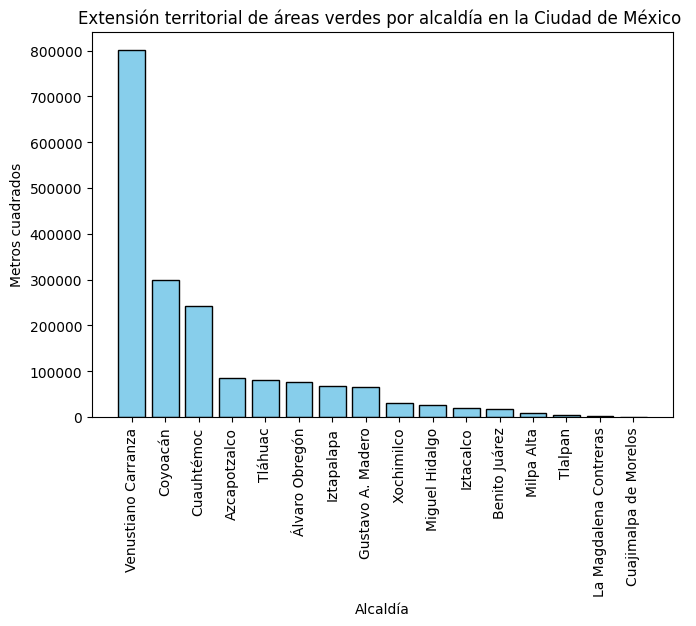

In [156]:
df1 = df.groupby(['Alcaldia']).sum('Extension').sort_values('Extension',ascending=False)
data = df1.reset_index()
plt.rcParams["figure.figsize"] = [7.5, 5]
plt.rcParams["figure.autolayout"] = False
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(data['Alcaldia'],data['Extension'],color='skyblue',edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel("Alcaldía")
plt.ylabel("Metros cuadrados")

plt.title('Extensión territorial de áreas verdes por alcaldía en la Ciudad de México ')

plt.show()

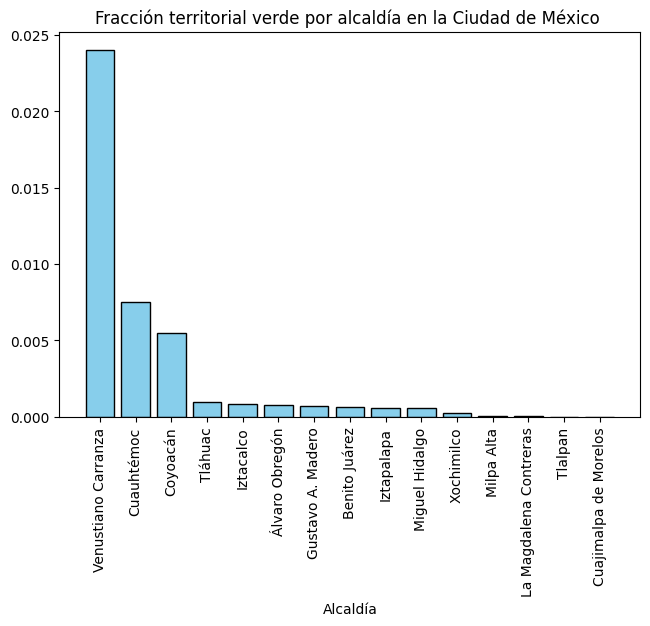

In [205]:
df1 = df.groupby(['Alcaldia']).sum('Fracción').reset_index().sort_values('Fracción',ascending=False)
df1
plt.rcParams["figure.figsize"] = [7.5, 5]
plt.rcParams["figure.autolayout"] = False
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(df1['Alcaldia'],df1['Fracción'],color='skyblue',edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel("Alcaldía")


plt.title('Fracción territorial verde por alcaldía en la Ciudad de México ')

plt.show()

In [ ]:
df1 = df.groupby(['Alcaldia']).sum('Extension').sort_values('Extension',ascending=False)
data = df1.reset_index()
plt.rcParams["figure.figsize"] = [7.5, 5]
plt.rcParams["figure.autolayout"] = False
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(data['Alcaldia'],data['Extension'],color='skyblue',edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel("Alcaldía")
plt.ylabel("Metros cuadrados")

plt.title('Extensión territorial de áreas verdes por alcaldía en la Ciudad de México ')

plt.show()

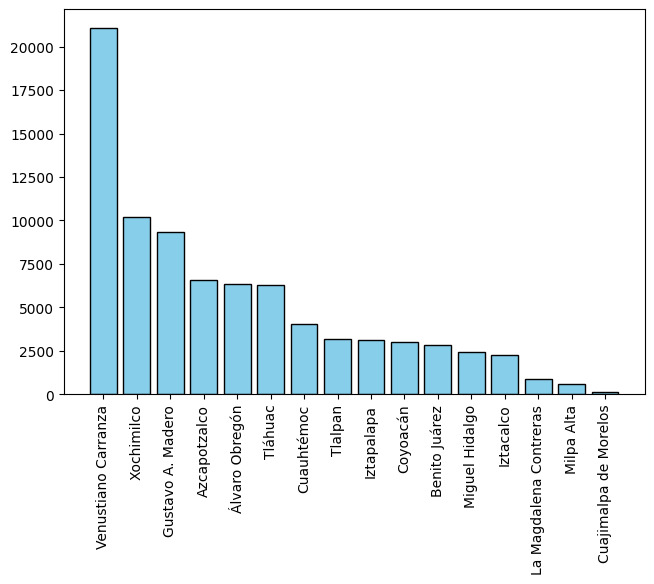

In [149]:
df1 = df.groupby(['Alcaldia']).mean('Extension').sort_values('Extension',ascending=False)
data = df1.reset_index()
plt.rcParams["figure.figsize"] = [7.5, 5]
plt.rcParams["figure.autolayout"] = False
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(data['Alcaldia'],data['Extension'],color='skyblue',edgecolor='black')
plt.xticks(rotation = 90)
plt.show()

                  Alcaldia  count
0                 Coyoacán     99
1               Cuauhtémoc     60
2      Venustiano Carranza     38
3               Iztapalapa     22
4               Milpa Alta     13
5                  Tláhuac     13
6             Azcapotzalco     13
7           Álvaro Obregón     12
8           Miguel Hidalgo     11
9                Iztacalco      9
10       Gustavo A. Madero      7
11           Benito Juárez      6
12              Xochimilco      3
13  La Magdalena Contreras      2
14   Cuajimalpa de Morelos      1
15                 Tlalpan      1


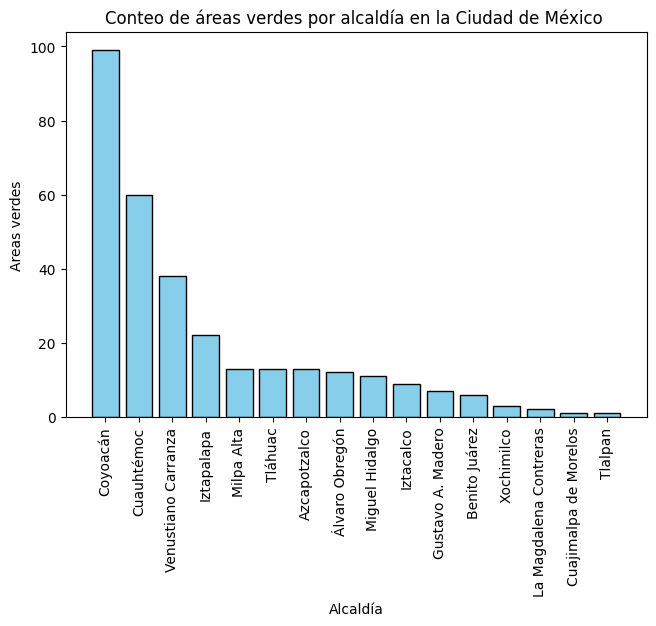

In [154]:
data = df['Alcaldia'].value_counts().reset_index()
print(df['Alcaldia'].value_counts().reset_index())
plt.rcParams["figure.figsize"] = [7.5, 5]
plt.rcParams["figure.autolayout"] = False
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(data['Alcaldia'],data['count'],color='skyblue', edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel("Alcaldía")
plt.ylabel("Areas verdes")

plt.title('Conteo de áreas verdes por alcaldía en la Ciudad de México ')

plt.show()

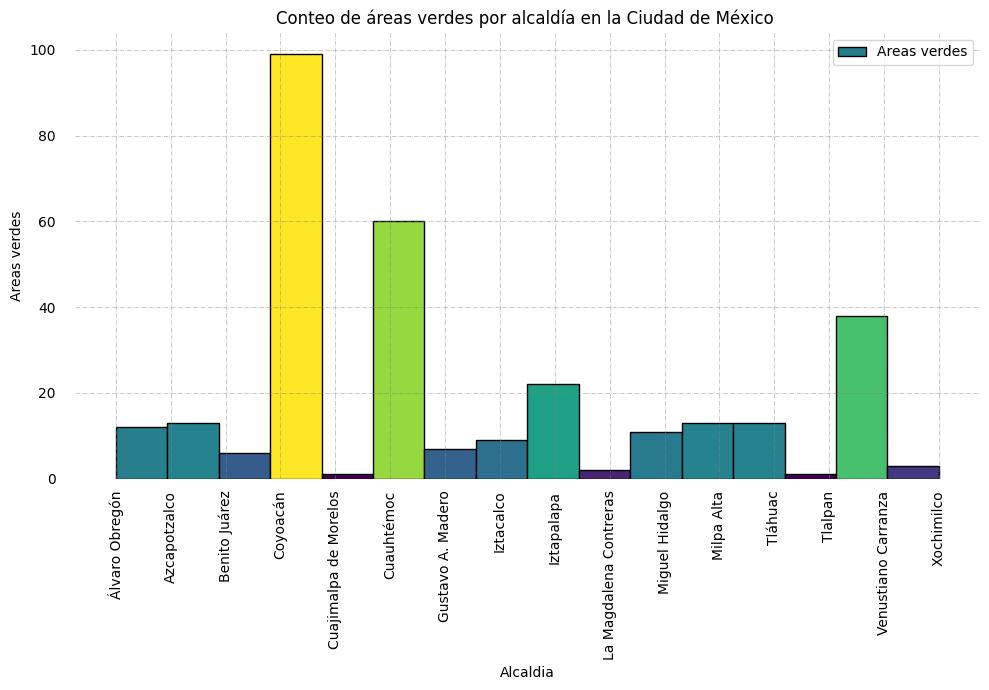

In [147]:
# Creating dataset

N_points = 10000
n_bins = 20
 
# Creating distribution
x = df['Alcaldia']
#y = .8 ** x + np.random.randn(10000) + 25
legend = ['Areas verdes']
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7), 
                        tight_layout = True)
 
 
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    axs.spines[s].set_visible(False) 
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none') 
axs.yaxis.set_ticks_position('none') 
   
# Add padding between axes and labels 
axs.xaxis.set_tick_params(pad = 5) 
axs.yaxis.set_tick_params(pad = 10) 
 
# Add x, y gridlines 
axs.grid( color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
 

 
# Creating histogram
N, bins, patches = axs.hist(x, bins = 16,edgecolor='black')
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features    
plt.xlabel("Alcaldia")
plt.ylabel("Areas verdes")
plt.legend(legend)
plt.title('Conteo de áreas verdes por alcaldía en la Ciudad de México ')
 
plt.xticks(rotation = 90)
# Show plot
plt.show()